# Homework 3: Logistics Regression
Implement everywhere that has an ellipsis (`...`).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Load dataset

In [2]:
from sklearn.datasets import load_iris
data = load_iris()
X, Y = data.data, data.target

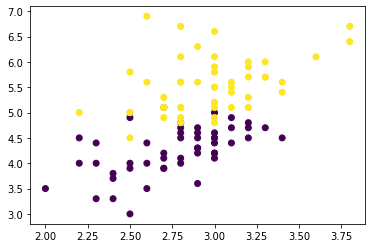

In [3]:
# only classify class 1 vs. class 2
X = X[Y >= 1, :]
Y = Y[Y >= 1]
plt.scatter(X[:,1], X[:,2], c=Y)

In [4]:
Y[Y == 2] = 0
Y = Y.reshape(100, 1)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=102)

print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Training set: (80, 4) (80, 1)
Test set: (20, 4) (20, 1)


### Define classification model
Create parameters here. Initialize with zeros. In case you forgot: $Y = \sigma(X\Theta)$.

In [6]:
# Initialize weight and bias
def initialize(X):
    w = np.zeros((X.shape[1], 1))
    b = np.zeros((1, 1))
    return w, b

In [7]:
# Sigmoid
def sigmoid(X):
    return 1 / (1 + np.exp(-X))

In [8]:
def forward(X, w, b):
    Z = np.dot(X, w) + b
    y_hat = sigmoid(Z)
    return y_hat

In [9]:
# Binary cross entropy loss
def binary_cross_entropy(Y, Y_hat):
    J = -np.mean(Y * np.log(Y_hat) + (1 - Y) * np.log(1 - Y_hat))
    return J

### Hyperparameters

In [10]:
# learning rate
alpha = 0.015
# epochs
epoch = 10000

### Train the model.

In [11]:
# Gradient Descent Loss Function
def gradient(X, Y, y_hat):
    N = X.shape[0]
    dw = (1/N) * (np.dot(X.T, (y_hat - Y)))
    db = (1/N) * (np.sum(y_hat - Y, keepdims= True))
    return dw, db

In [12]:
# Update dw, db
def update(w, b, dw, db, learning_rate):
    w = w - learning_rate * dw
    b = b - learning_rate * db
    return w,b

In [13]:
# your code here
# X_test, y_test chỉ dùng để lấy loss của tập test, ko tham gia vào quá trình train

def train(X, Y, learning_rate, epochs, X_test, y_test):
    w, b = initialize(X)
    
    train_loss = []
    test_loss = []
    
    for i in range(epochs):
        y_hat = forward(X, w, b)
        
        # Training loss
        J_train = binary_cross_entropy(Y, y_hat)
        train_loss.append(J_train)
        
        # Test loss
        J_test = binary_cross_entropy(y_test, forward(X_test, w, b))
        test_loss.append(J_test)
        if i % 1000 == 0:
            print(f'Step {i}: Train loss = {J_train}')
        
        dw, db = gradient(X, Y, y_hat)
        w, b = update(w, b, dw, db, learning_rate)
        
    return w, b, train_loss, test_loss

In [14]:
w, b, train_loss, test_loss = train(X_train, y_train, learning_rate= alpha, epochs= epoch, X_test= X_test, y_test= y_test)

Step 0: Train loss = 0.6931471805599453
Step 1000: Train loss = 0.3789423433652798
Step 2000: Train loss = 0.27810564198227644
Step 3000: Train loss = 0.2294640777149668
Step 4000: Train loss = 0.20044143015807664
Step 5000: Train loss = 0.1808922139938759
Step 6000: Train loss = 0.1666704775007823
Step 7000: Train loss = 0.155763493536259
Step 8000: Train loss = 0.14707215161549603
Step 9000: Train loss = 0.13994285348239896


In [15]:
def plot(train_loss, test_loss):  
    plt.figure(figsize=(10, 6))
    plt.plot(train_loss, label='Training Loss', alpha=0.5)
    plt.plot(test_loss, label='Test Loss', alpha=0.5)
    plt.legend()
    plt.show()

In [16]:
def predict(X, w, b):
    Z = np.dot(X, w) + b
    y_hat = sigmoid(Z)
    
    return y_hat > 0.46

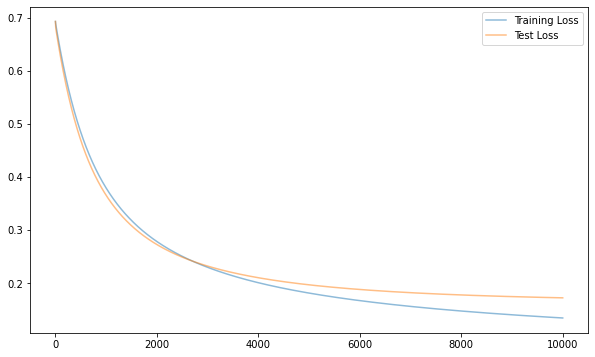

In [17]:
plot(train_loss, test_loss)

In [18]:
# just to double check
# assert np.allclose(w, np.array([0.12047504, -0.44156746, -0.89309501, 2.965364, 3.3427994]))

### Define evaluation metrics

In [19]:
def accuracy(X, Y, weight, bias):
    '''
    Evaluate the model, represented by `weight`, with data (X, Y).
    
    Input:
        X:      data features
        Y:      data labels
        weight: model weights
    Ouput:
        Model accuracy on input data.
    '''
    
    # implement your code here
    y_hat = predict(X, weight, bias)
    
    count = 0
    for i in range(len(Y)):
        if y_hat[i] == Y[i]:
            count += 1
        
    return count/len(Y) * 100

In [20]:
# Model accuracy

print('Train set accuracy: ' + str(accuracy(X_train, y_train, w, b)) + '%')
print('Test set accuracy: ' +  str(accuracy(X_test, y_test, w, b)) + '%')
print('Weight matrix: ')
print(w)
print('Bias: ', b)

Train set accuracy: 98.75%
Test set accuracy: 90.0%
Weight matrix: 
[[ 2.8105939 ]
 [ 2.51105828]
 [-4.0085978 ]
 [-4.26208094]]
Bias:  [[1.945852]]


## Data normalization
Remember: normalization is done per feature, not all at once. Also, remember that Y is [1, 2] instead of [0, 1].

### Feature normalization with MinMaxScaler

In [48]:
def MinMaxScaler(X):
    minn, maxx = [], []
    for i in range(X.shape[1]):
        min_column = np.min(X[:,i:i+1])
        max_column = np.max(X[:,i:i+1])
        X[:,i:i+1] = (X[:,i:i+1] - min_column) / (max_column - min_column)
        minn.append(min_column)
        maxx.append(max_column)
    return X, minn, maxx

In [ ]:
def model_fit(Input, model):
    

In [22]:
X_train_minmax = X_train.copy()
X_train_minmax = MinMaxScaler(X_train_minmax)

In [23]:
w_, b_, train_loss_, test_loss_ = train(X_train_minmax, y_train, learning_rate= alpha, epochs= epoch, X_test= X_test, y_test= y_test)

Step 0: Train loss = 0.6931471805599453
Step 1000: Train loss = 0.5166450320790084
Step 2000: Train loss = 0.4228302914418382
Step 3000: Train loss = 0.36464383978496695
Step 4000: Train loss = 0.32502466587606343
Step 5000: Train loss = 0.29611730576985673
Step 6000: Train loss = 0.2739275741906443
Step 7000: Train loss = 0.25623528341320345
Step 8000: Train loss = 0.2417125817288226
Step 9000: Train loss = 0.22951674167066435


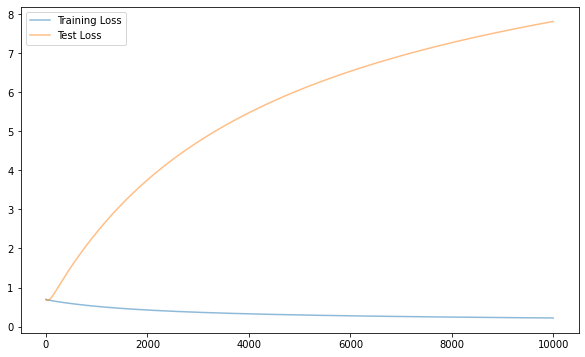

In [24]:
plot(train_loss_, test_loss_)

In [25]:
print('Train set accuracy: ' + str(accuracy(X_train_minmax, y_train, w_, b_)) + '%')
print('Test set accuracy: ' +  str(accuracy(X_test, y_test, w_, b_)) + '%')
print('Weight matrix: ')
print(w_)
print('Bias: ', b_)

Train set accuracy: 93.75%
Test set accuracy: 55.00000000000001%
Weight matrix: 
[[-0.38213527]
 [ 1.17665559]
 [-3.55789178]
 [-5.38522669]]
Bias:  [[3.52612777]]


### Feature normalization with Mean Normalization

In [26]:
def MeanScaler(X):
    for i in range(X.shape[1]):
        X[:,i:i+1] = (X[:,i:i+1] - np.mean(X[:,i:i+1])) / (np.max(X[:,i:i+1] - np.min(X[:,i:i+1])))
        
    return X

In [27]:
X_train_mean = X_train.copy()
X_train_mean = MeanScaler(X_train_mean)

In [28]:
_w_, _b_, train_loss_, test_loss_ = train(X_train_mean, y_train, learning_rate= alpha, epochs= epoch, X_test= X_test, y_test= y_test)

Step 0: Train loss = 0.6931471805599453
Step 1000: Train loss = 0.4650065717367597
Step 2000: Train loss = 0.3744792806895507
Step 3000: Train loss = 0.32558690274670693
Step 4000: Train loss = 0.2939391777543167
Step 5000: Train loss = 0.2711413990489304
Step 6000: Train loss = 0.25356639807925935
Step 7000: Train loss = 0.239384128422442
Step 8000: Train loss = 0.22756362102988845
Step 9000: Train loss = 0.21747440773748453


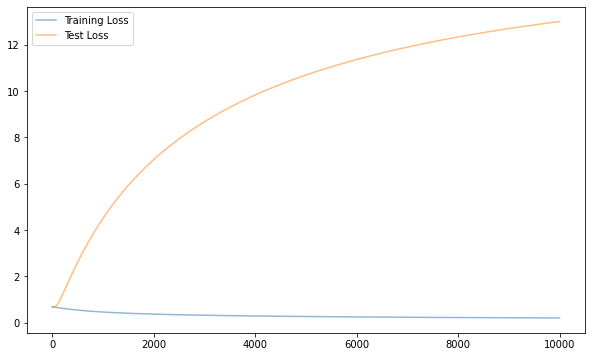

In [29]:
plot(train_loss_, test_loss_)

In [30]:
print('Train set accuracy: ' + str(accuracy(X_train_mean, y_train, w_, b_)) + '%')
print('Test set accuracy: ' +  str(accuracy(X_test, y_test, w_, b_)) + '%')
print('Weight matrix: ')
print(_w_)
print('Bias: ', _b_)

Train set accuracy: 55.00000000000001%
Test set accuracy: 55.00000000000001%
Weight matrix: 
[[-0.89948539]
 [ 0.36207418]
 [-4.08461758]
 [-5.71845499]]
Bias:  [[-0.01852919]]


### Feature normalization with StandardScaler

In [31]:
def StandardScaler(X):
    nuy = []
    for i in range(X.shape[1]):
        nuy.append(np.mean(X[:,i:i+1]))
    
    for i in range(X.shape[1]):
        X[:,i:i+1] = (X[:,i:i+1] - nuy[i]) / (np.sqrt(np.sum((X[:,i:i+1] - nuy[i])**2) / (X.shape[0])))
        
    return X

In [32]:
X_train_standard = X_train.copy()
X_train_standard = StandardScaler(X_train_standard)

In [33]:
w__, b__, train_loss__, test_loss__ = train(X_train_standard, y_train, learning_rate= alpha, epochs= epoch, X_test= X_test, y_test= y_test)

Step 0: Train loss = 0.6931471805599453
Step 1000: Train loss = 0.17425323706286933
Step 2000: Train loss = 0.12595174988931704
Step 3000: Train loss = 0.10439790554055425
Step 4000: Train loss = 0.09177680106726564
Step 5000: Train loss = 0.0832986309478766
Step 6000: Train loss = 0.07711383862509663
Step 7000: Train loss = 0.07234756883962876
Step 8000: Train loss = 0.06852799957377273
Step 9000: Train loss = 0.06537621597506656


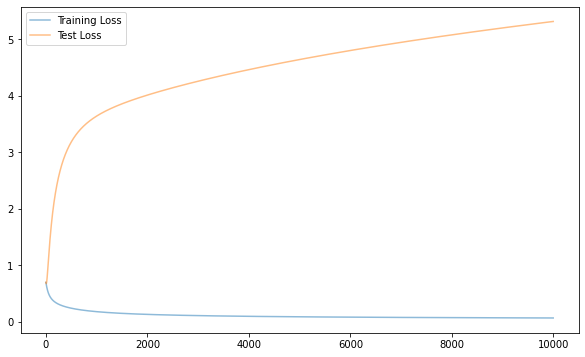

In [34]:
plot(train_loss__, test_loss__)

In [35]:
print('Train set accuracy: ' + str(accuracy(X_train_standard, y_train, w__, b__)) + '%')
print('Test set accuracy: ' +  str(accuracy(X_test, y_test, w__, b__)) + '%')
print('Weight matrix: ')
print(w__)
print('Bias: ', b__)

Train set accuracy: 100.0%
Test set accuracy: 55.00000000000001%
Weight matrix: 
[[ 0.86131504]
 [ 1.15951166]
 [-3.579253  ]
 [-3.95693094]]
Bias:  [[-0.05869369]]


### Feature normalization with Unit Vector Normalization

In [36]:
def UnitVectorNorm(X):
    for i in range(X.shape[0]):
        X[i:i+1,:] = X[i:i+1,:] / np.sqrt(np.sum(X[i:i+1,:] ** 2))
        
    return X

In [37]:
X_train_uv = X_train.copy()
X_train_uv = UnitVectorNorm(X_train_uv)

In [38]:
_w__, _b__, train_loss__, test_loss__ = train(X_train_uv, y_train, learning_rate= alpha, epochs= epoch, X_test= X_test, y_test= y_test)

Step 0: Train loss = 0.6931471805599453
Step 1000: Train loss = 0.6850507163631953
Step 2000: Train loss = 0.6774289199855541
Step 3000: Train loss = 0.6699645623443923
Step 4000: Train loss = 0.6626542756312124
Step 5000: Train loss = 0.6554947267936105
Step 6000: Train loss = 0.6484826204430798
Step 7000: Train loss = 0.6416147015775417
Step 8000: Train loss = 0.6348877580352876
Step 9000: Train loss = 0.6282986226903411


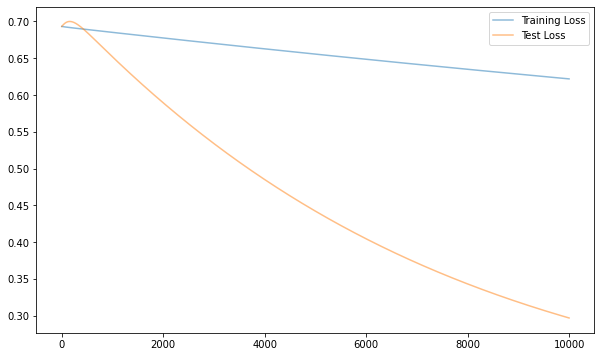

In [39]:
plot(train_loss__, test_loss__)

In [40]:
print('Train set accuracy: ' + str(accuracy(X_train_uv, y_train, _w__, _b__)) + '%')
print('Test set accuracy: ' +  str(accuracy(X_test, y_test, _w__, _b__)) + '%')
print('Weight matrix: ')
print(_w__)
print('Bias: ', _b__)

Train set accuracy: 65.0%
Test set accuracy: 90.0%
Weight matrix: 
[[ 1.54612967]
 [ 1.05801646]
 [-1.93497044]
 [-1.83999674]]
Bias:  [[0.02173957]]


### (Optional) How low can you go?
Do anything you want to get the best performance out of the training set. For once, let's overfit to your heart's content.

In [41]:
# do some fun code here and try to match this :)
...

In [42]:
print('Weights:', w)
y = 1 / (1 + np.exp(-X_train @ w + b))
loss = -np.sum(y_train * np.log(y) + (1 - y_train) * np.log(1 - y))
print('Loss:', loss)
print('Accuracy:', accuracy(X_train, y_train, w, b))

Weights: [[ 2.8105939 ]
 [ 2.51105828]
 [-4.0085978 ]
 [-4.26208094]]
Loss: 65.33247666632995
Accuracy: 98.75
